In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
# from marketsim.simulator.simulator_test_extended import SimulatorSampledArrival
from marketsim.simulator.simulator_test_0noise import SimulatorSampledArrival

from tqdm.notebook import tqdm

In [2]:
# %%timeit
# 
# sim = Simulator(num_agents=66, sim_time=60000, lam=1e-4, mean=1e7, r=.05, shock_var=1e6)
# sim.run()

In [3]:
%%time
surpluses = []

for _ in tqdm(range(1000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=12000, 
                                  lam=5e-4, 
                                  mean=1e5, 
                                  r=0, 
                                  shock_var=5e6, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/1000 [00:00<?, ?it/s]

Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 1.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
Min: 0.0
M

/Users/rishithseelam/Code/SURE-SRG/market-sim-py/marketsim/agent/obs_noise_zi_agent.py:72: RuntimeWarning: invalid value encountered in scalar divide
  posterior_mean = (self.obs_var * updated_prior_mean + updated_prior_var * observation) / (self.obs_var + updated_prior_var)


ZeroDivisionError: float division by zero

In [4]:
surpluses

[tensor(-236.4375),
 tensor(-381.3449),
 tensor(-444.1659),
 tensor(-325.1166),
 tensor(-685.4387),
 tensor(-490.5625),
 tensor(-654.8102),
 tensor(-200.7701),
 tensor(-205.9715),
 tensor(-180.3894),
 tensor(-501.6680),
 tensor(-587.4369),
 tensor(-642.9856),
 tensor(-226.1430),
 tensor(-355.3978),
 tensor(-206.4002),
 tensor(-527.2500),
 tensor(-537.3389),
 tensor(-335.2921),
 tensor(-567.0147),
 tensor(-710.3819),
 tensor(-1221.4116),
 tensor(-887.3101),
 tensor(-866.9033),
 tensor(-520.1908),
 tensor(-970.5637),
 tensor(-184.6568),
 tensor(-684.6791),
 tensor(-497.5817),
 tensor(-292.1214),
 tensor(-582.2494),
 tensor(-398.3338),
 tensor(-1080.1766),
 tensor(-655.0511),
 tensor(-1113.4952),
 tensor(-1274.8822),
 tensor(-500.1028),
 tensor(-817.3702),
 tensor(-1009.0048),
 tensor(-856.3245),
 tensor(-621.1238),
 tensor(-757.5914),
 tensor(-663.8588),
 tensor(-493.9279),
 tensor(-560.2572),
 tensor(-539.9195),
 tensor(-960.0273),
 tensor(-1091.0312),
 tensor(-768.1947),
 tensor(-343.6

In [6]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=24000, 
                                  lam=5e-4, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=1e6, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(13776.3555)
CPU times: user 41min 31s, sys: 10min 50s, total: 52min 22s
Wall time: 6min 56s


In [28]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=1000, 
                                  lam=5e-3, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=5e5, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(10411.2129)
CPU times: user 14min 48s, sys: 962 ms, total: 14min 49s
Wall time: 1min 5s


99386.0859375


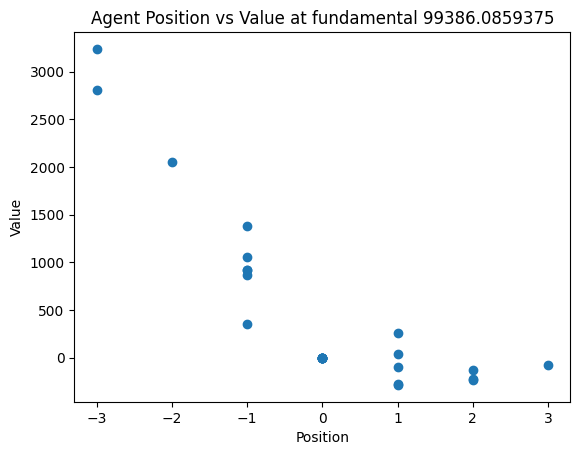

In [7]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


101861.71875


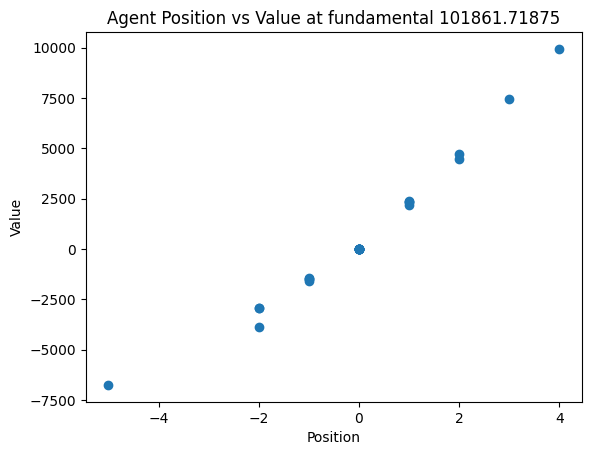

In [8]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


102256.9453125


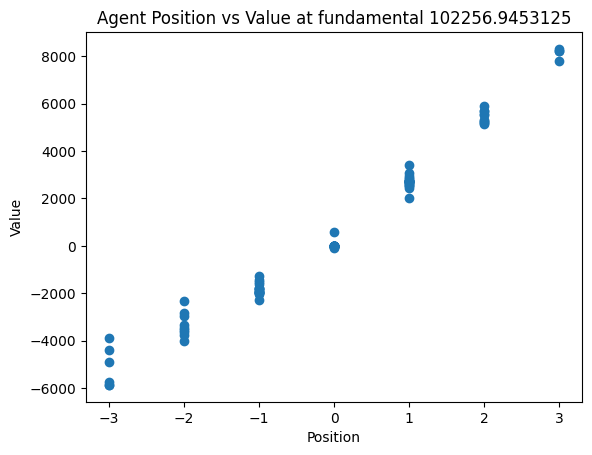

In [9]:
sim = SimulatorSampledArrival(num_background_agents=100, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()
